# Análisis TF-IDF

Dentro de este documento se realizará un análisis al TF-IDF obtenido a partir de un pequeño corpus recolectado con los términos y condiciones de algunos servicios en internet.

In [15]:
#Importar elementos necesarios de las librerías
import nltk
import os
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import PlaintextCorpusReader, stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.stem.snowball import SpanishStemmer
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [16]:
#Funciones auxiliares

#Crea un corpus usando los documentos de una ruta
def read_files(path):
    corpus, size = [], []
    files = os.listdir(path)
    for file in files:
        texto = PlaintextCorpusReader(ruta, file)
        size.append(len(texto.words()))
        texto = texto.raw()
        corpus.append(texto)
    return corpus, size

#Crea un dataframe a partir de un array que contenga el tf-idf de un corpus
def tf_idf_to_dataframe(array_tf_idf,path):
    files = os.listdir(path)
    for i, doc in enumerate(array_tf_idf):
        title = files[i].replace(".txt","")
        tf_idf_single_document = list(zip(tf_idf.get_feature_names(), doc, [i for _ in range(len(doc))], [title for _ in range(len(doc))]))
        if i == 0:
            df = pd.DataFrame(tf_idf_single_document, columns=['token', 'tf_idf','id_documento','nombre_documento'])
        else:
            df2 = pd.DataFrame(tf_idf_single_document, columns=['token', 'tf_idf','id_documento','nombre_documento'])
            df = df.append(df2)
    return df

#Función auxiliar para realizar graficos de barras
def plot_bar(title,x,y,x_name,y_name,scale=None):
    plt.bar(x, y, align='center', alpha=0.5)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    if scale != None: plt.yscale(scale)
    plt.title(title)
    plt.grid()
    plt.show()

#Grafica el tf-idf de cada documento de una ruta e imprime el tamaño de cada documento
def plot_tf_idf(array_tf_idf,path,size):
    files = os.listdir(path)
    for i, doc in enumerate(array_tf_idf):
        document_title = files[i].replace(".txt","")
        print("Cantidad de tokens del documento de {}: {}".format(document_title,size[i]))
        x_axis = [i for i in range(len(doc))]
        plot_bar(document_title,x_axis,doc,'Llaves del token','Tf-idf','log')
        
#Grafica el tf-idf máximo y promedio de cada token en el corpus
def plot_general_tf_idf(array_tf_idf,path,tokens):
    files = os.listdir(path)
    max_tf_idf, mean_tf_idf = [0 for _ in range(tokens)], [0 for _ in range(tokens)]
    for i, doc in enumerate(array_tf_idf):
        tf_idf_single_document = list(zip(tf_idf.get_feature_names(), doc, [i for _ in range(len(doc))]))
        document_title = files[i].replace(".txt","")
        max_tf_idf = [max(max_tf_idf[j],doc[j]) for j in range(tokens)]
        mean_tf_idf = [mean_tf_idf[j] + doc[j] for j in range(tokens)]
    mean_tf_idf = [mean_tf_idf[j]/(i+1) for j in range(tokens)]
    x_axis = [i for i in range(tokens)]
    plot_bar('Tf-idf máximo',x_axis,max_tf_idf,'Llave del token','Tf-idf','log')
    plot_bar('Tf-idf promedio',x_axis,mean_tf_idf,'Llave del token','Tf-idf','log')
    
def show_top_tokens(df,path,n):
    files = os.listdir(path)
    for text in files:
        title = text.replace(".txt","")
        print(df[df.nombre_documento == title].head(n),'\n\n')

In [17]:
#ruta = "D:/Documents/Documentos Universidad/Noveno/Proyecto de grado/textos"
ruta = "D:/Documents/Documentos Universidad/Noveno/Proyecto de grado/textos"
corpus, tamaño = read_files(ruta)

tf_idf = TfidfVectorizer()

#Matriz tf-idf
result = tf_idf.fit_transform(corpus)

#print(result)

# Conocimiento de los datos
## Corpus

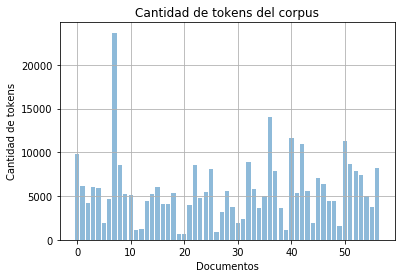

In [18]:
#Cantidad de tokens en cada documento
x_axis = [i for i in range(len(tamaño))]

plot_bar('Cantidad de tokens del corpus',x_axis,tamaño,'Documentos','Cantidad de tokens')

In [19]:
#Principales estadisticos
promedio = np.mean(tamaño)
desviacion = np.std(tamaño)
mediana = np.median(tamaño)
tamaño_ordenado = tamaño.copy()
tamaño_ordenado.sort()
minimo = tamaño_ordenado[0]
maximo = tamaño_ordenado[-1]
print("Minimo: ",minimo)
print("Mediana: ", mediana)
print("Máximo: ", maximo)
print("Promedio: ", promedio)
print("Desviación estandar:", desviacion)

Minimo:  669
Mediana:  5192.0
Máximo:  23681
Promedio:  5696.473684210527
Desviación estandar: 3778.2181640187896


In [20]:
#Cantidad de tokens únicos en todo el corpus
result.shape[1]

11601

In [21]:
#Tokens
tokens = tf_idf.get_feature_names()
tokens

['00',
 '000',
 '0003',
 '01',
 '013',
 '018000',
 '018000510510',
 '018000528888',
 '02',
 '041',
 '06133',
 '07',
 '08',
 '09763672',
 '10',
 '100',
 '1000',
 '10011',
 '100624',
 '100625',
 '101',
 '103',
 '106',
 '107',
 '1074',
 '1097',
 '11',
 '110019',
 '111',
 '1128',
 '12',
 '120',
 '1201',
 '123',
 '123691',
 '125',
 '1266',
 '13',
 '1300',
 '133',
 '1355',
 '1377',
 '14',
 '1401',
 '142',
 '1421',
 '1455',
 '1480',
 '14th',
 '15',
 '150th',
 '1581',
 '16',
 '1600',
 '1601',
 '17',
 '175',
 '1798',
 '18',
 '1855',
 '18th',
 '19',
 '192',
 '1974',
 '1980',
 '1994',
 '1textbroker',
 '20',
 '200',
 '2001',
 '2003',
 '2008',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '20200416',
 '2021',
 '21',
 '2113',
 '212',
 '22',
 '227',
 '23',
 '2347',
 '2349',
 '236n',
 '237218316',
 '24',
 '242',
 '2460220',
 '2499',
 '25',
 '255',
 '260',
 '264',
 '27',
 '2704',
 '2772',
 '28',
 '28006',
 '29',
 '2nd',
 '30',
 '307',
 '3077115',
 '

In [22]:
tokens.reverse()
tokens

['útiles',
 'útil',
 'únicos',
 'único',
 'únicas',
 'únicamente',
 'única',
 'únete',
 'últimos',
 'último',
 'últimasfacturaspara',
 'últimas',
 'última',
 'órganos',
 'órdenes',
 'óptimos',
 'óptimo',
 'óptimas',
 'óptima',
 'ítem',
 'íntimos',
 'íntimo',
 'íntima',
 'íntegro',
 'íntegramente',
 'índole',
 'índices',
 'índice',
 'íconos',
 'ícono',
 'éxito',
 'étnico',
 'ético',
 'éstos',
 'éste',
 'éstas',
 'ésta',
 'él',
 'échale',
 'áreas',
 'área',
 'árbitros',
 'árbitro',
 'ánimo',
 'ángeles',
 'ámsterdam',
 'ámbitos',
 'ámbito',
 'álcalis',
 'álbumes',
 'álbum',
 'ágil',
 'áfrica',
 'ácidos',
 'zoominfo',
 'zonas',
 'zona',
 'zentrums',
 'zelanda',
 'zapatos',
 'zahri',
 'youtube',
 'youtu',
 'yourname',
 'your',
 'you',
 'york',
 'yoga',
 'yendo',
 'yangho',
 'ya',
 'xoom',
 'xml',
 'xiii',
 'xii',
 'xi',
 'xenófoba',
 'xbox',
 'www',
 'world',
 'workspace',
 'word',
 'wlan',
 'with',
 'windowslifecycle',
 'windows',
 'window',
 'willow',
 'will',
 'wifi',
 'widgets',
 'wide'

## Matriz TF-IDF

In [23]:
#Tipo matriz tf-idf
type(result)

scipy.sparse.csr.csr_matrix

In [24]:
#dimensión de la matriz
result.shape

(57, 11601)

In [25]:
array_tf_idf = result.toarray()

df = tf_idf_to_dataframe(array_tf_idf,ruta)
df = df.query('tf_idf > 0').sort_values(by='tf_idf', ascending=False)

In [26]:
df.head(60)

,token,tf_idf,id_documento,nombre_documento
3217,deezer,0.762006,7,deezer
3134,de,0.738641,12,gdo-privacidad
3134,de,0.699139,31,nintendo-privacidad
8188,pinterest,0.692173,34,pinterest-condiciones
3134,de,0.682033,0,adobe-condiciones
3134,de,0.676685,28,netflix-privacidad
3134,de,0.670185,16,homecenter-privacidad
3134,de,0.660601,33,paypal-privacidad
3134,de,0.659513,8,discord
3134,de,0.659388,15,homecenter-condiciones


In [27]:
df.tail(60)

,token,tf_idf,id_documento,nombre_documento
6897,mal,0.000606,7,deezer
2935,creado,0.000606,7,deezer
4213,encargado,0.000606,7,deezer
6251,instalación,0.000606,7,deezer
6118,infringe,0.000606,7,deezer
3479,desee,0.000606,7,deezer
11231,veces,0.000588,7,deezer
10661,telefonía,0.000588,7,deezer
8285,ponga,0.000588,7,deezer
1960,cinco,0.000588,7,deezer


Cantidad de tokens del documento de adobe-condiciones: 9764


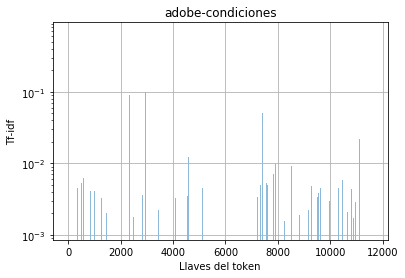

Cantidad de tokens del documento de adobe-privacidad: 6125


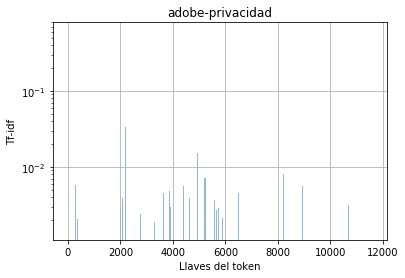

Cantidad de tokens del documento de aws: 4244


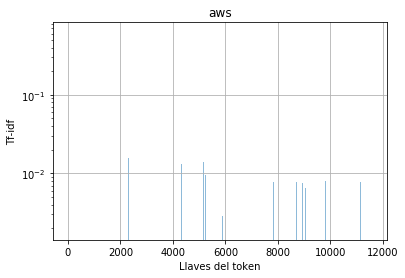

Cantidad de tokens del documento de azure-pagos: 6038


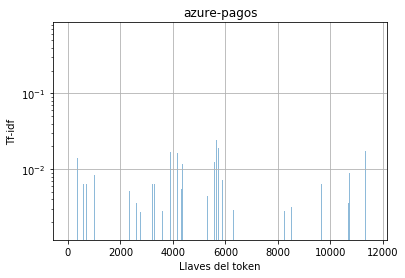

Cantidad de tokens del documento de chrome-privacidad: 5905


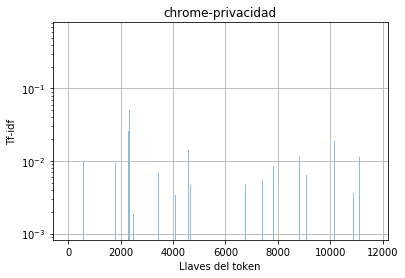

Cantidad de tokens del documento de civica: 1978


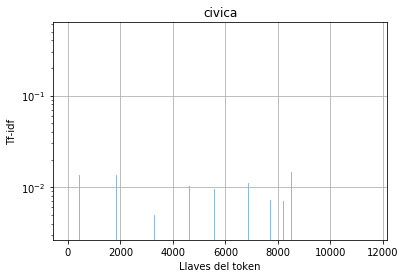

Cantidad de tokens del documento de colboletos: 4701


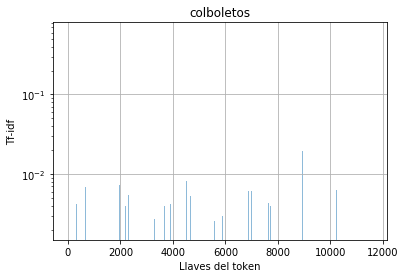

Cantidad de tokens del documento de deezer: 23681


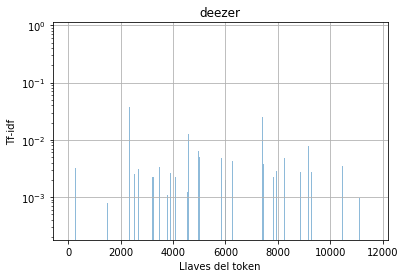

Cantidad de tokens del documento de discord: 8589


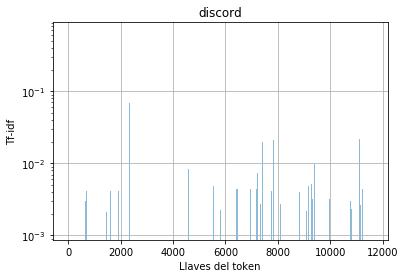

Cantidad de tokens del documento de facebook-condiciones: 5192


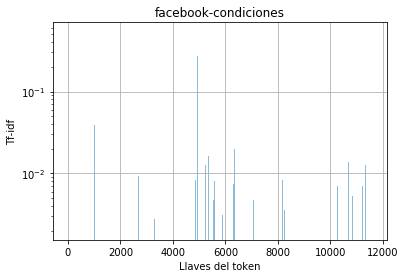

Cantidad de tokens del documento de facebook-privacidad: 5107


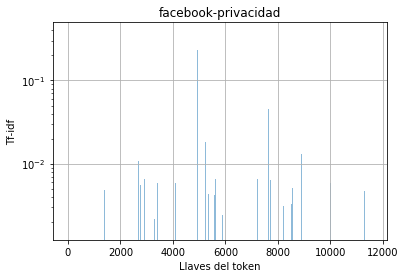

Cantidad de tokens del documento de gdo-pagos: 1177


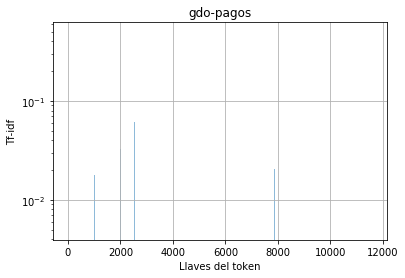

Cantidad de tokens del documento de gdo-privacidad: 1192


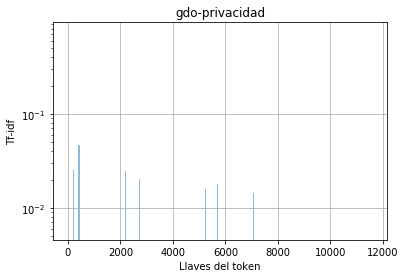

Cantidad de tokens del documento de google-condiciones: 4431


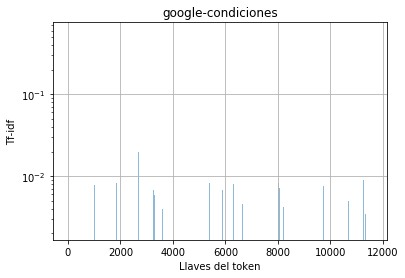

Cantidad de tokens del documento de google-privacidad: 5258


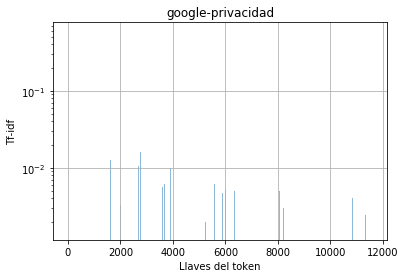

Cantidad de tokens del documento de homecenter-condiciones: 6058


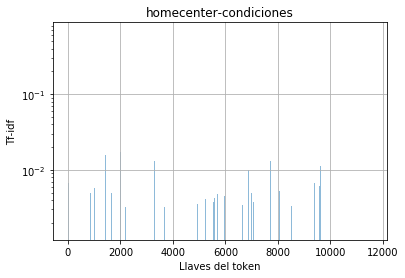

Cantidad de tokens del documento de homecenter-privacidad: 4057


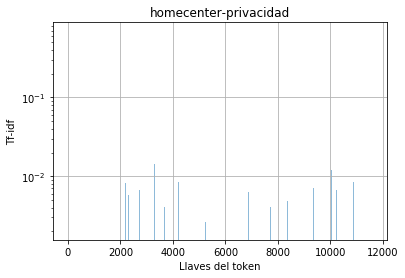

Cantidad de tokens del documento de instagram-condiciones: 4138


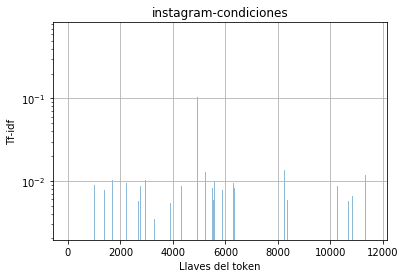

Cantidad de tokens del documento de instagram-privacidad: 5377


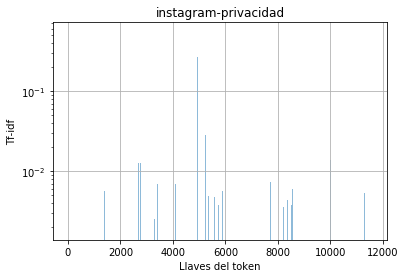

Cantidad de tokens del documento de libreria_nacional-cambios: 690


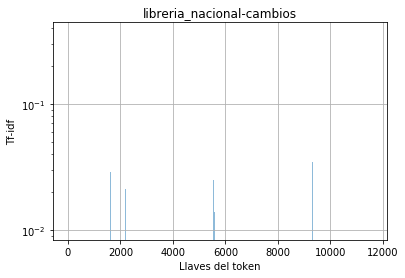

Cantidad de tokens del documento de libreria_nacional-condiciones: 669


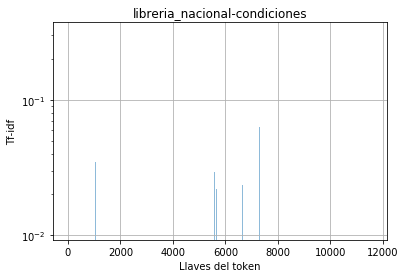

Cantidad de tokens del documento de libreria_nacional-privacidad: 3961


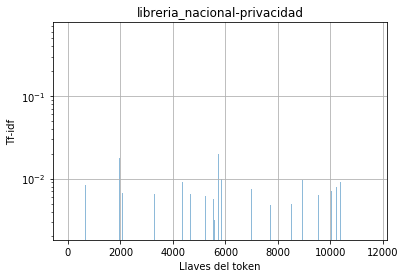

Cantidad de tokens del documento de linio-condiciones: 8528


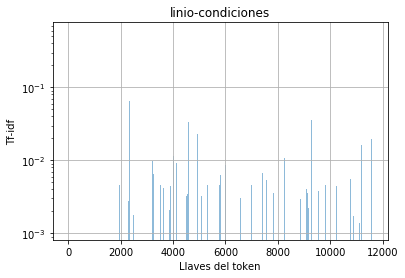

Cantidad de tokens del documento de linio-privacidad: 4828


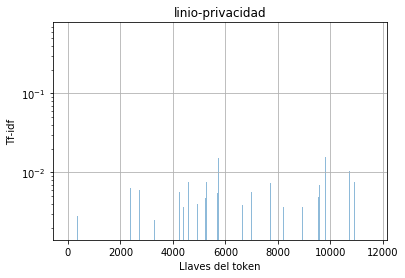

Cantidad de tokens del documento de linkedin-condiciones: 5432


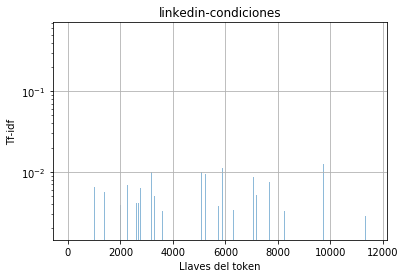

Cantidad de tokens del documento de linkedin-privacidad: 8061


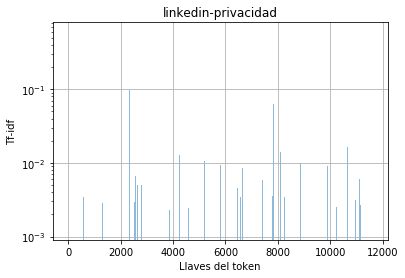

Cantidad de tokens del documento de mozilla-privacidad: 949


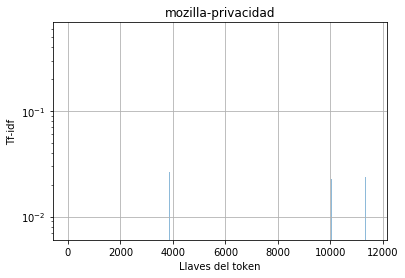

Cantidad de tokens del documento de netflix-condiciones: 3139


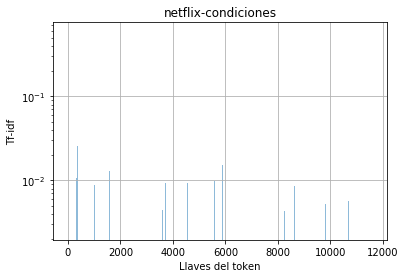

Cantidad de tokens del documento de netflix-privacidad: 5543


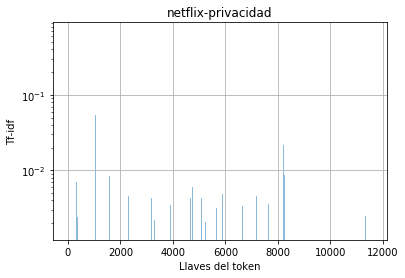

Cantidad de tokens del documento de nintendo-condiciones: 3793


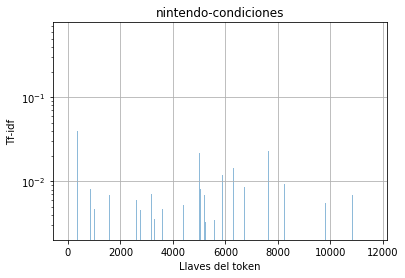

Cantidad de tokens del documento de nintendo-pagos: 1908


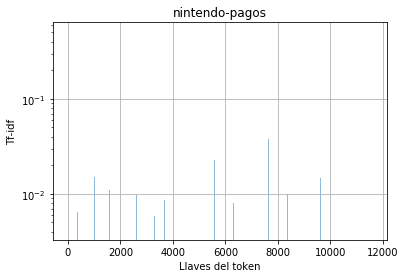

Cantidad de tokens del documento de nintendo-privacidad: 2403


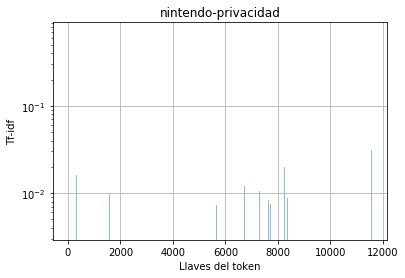

Cantidad de tokens del documento de olimpica: 8915


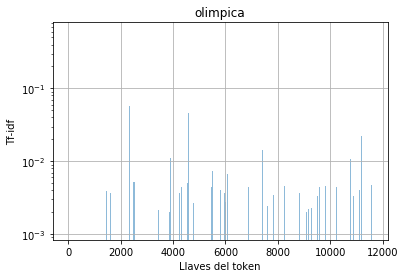

Cantidad de tokens del documento de paypal-privacidad: 5854


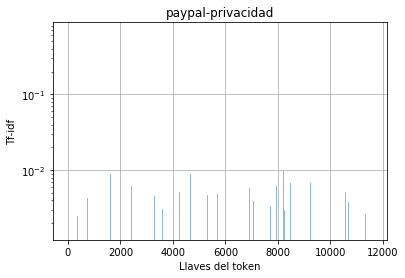

Cantidad de tokens del documento de pinterest-condiciones: 3655


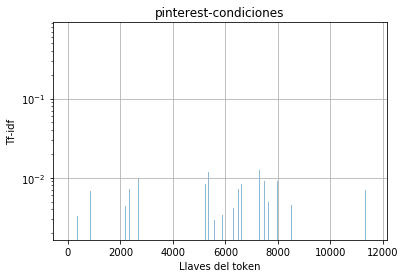

Cantidad de tokens del documento de pinterest-privacidad: 5042


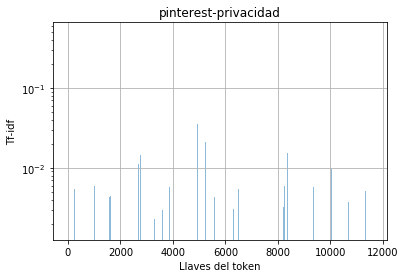

Cantidad de tokens del documento de platzi: 14057


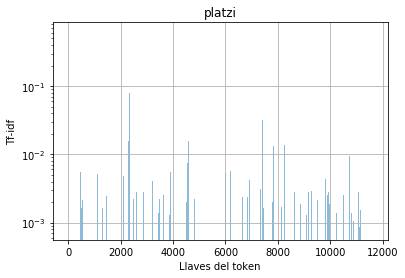

Cantidad de tokens del documento de quest: 7829


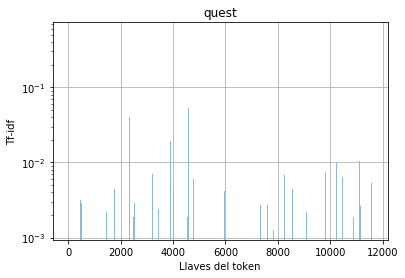

Cantidad de tokens del documento de segurosbolivar-condiciones: 3683


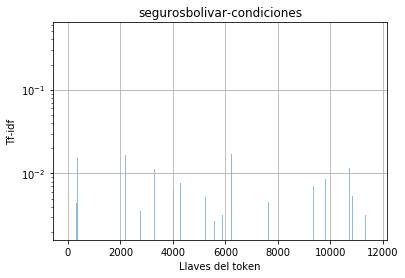

Cantidad de tokens del documento de segurosbolivar-privacidad: 1110


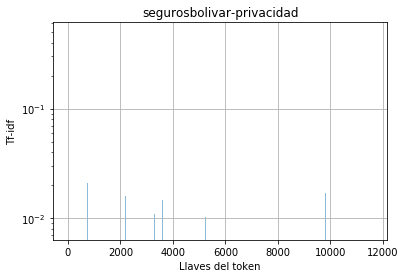

Cantidad de tokens del documento de snapchat-condiciones: 11683


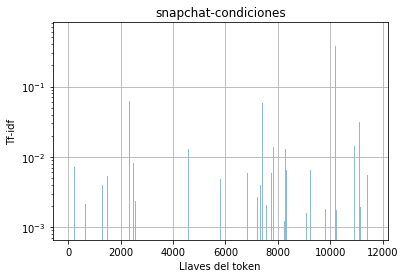

Cantidad de tokens del documento de snapchat-privacidad: 5298


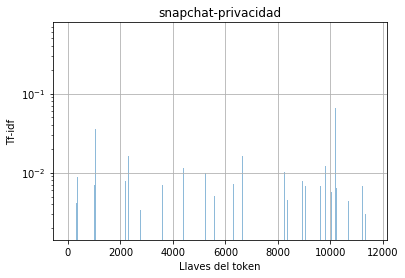

Cantidad de tokens del documento de spotify-condiciones: 10949


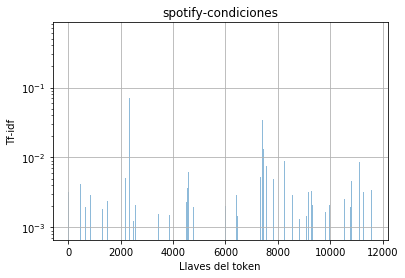

Cantidad de tokens del documento de spotify-privacidad: 5535


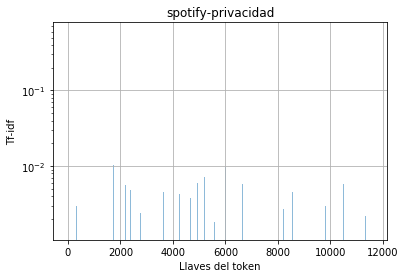

Cantidad de tokens del documento de superinter: 1954


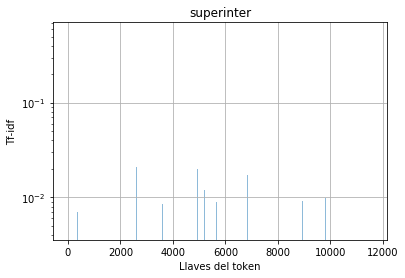

Cantidad de tokens del documento de textbroker-autores: 7111


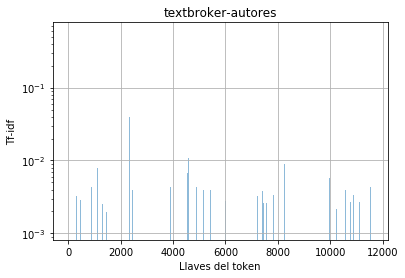

Cantidad de tokens del documento de textbroker-clientes: 6431


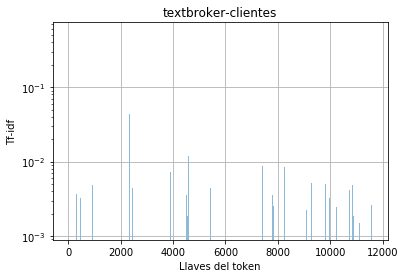

Cantidad de tokens del documento de toyota-privacidad: 4409


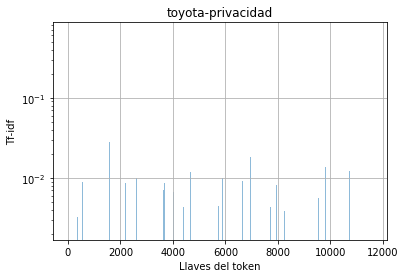

Cantidad de tokens del documento de twitter-condiciones: 4441


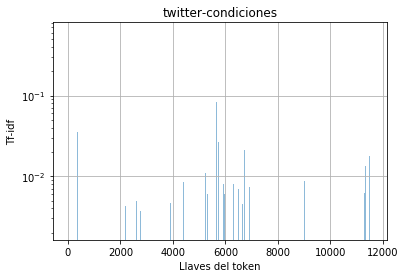

Cantidad de tokens del documento de twitter-privacidad: 1537


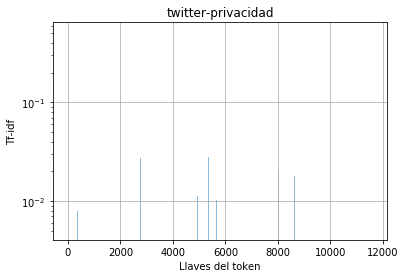

Cantidad de tokens del documento de uber-condiciones: 11347


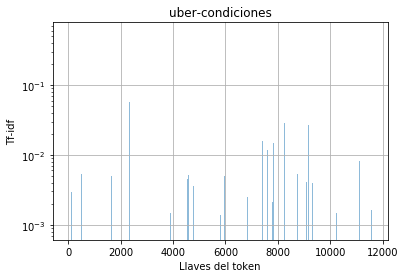

Cantidad de tokens del documento de uber-privacidad: 8677


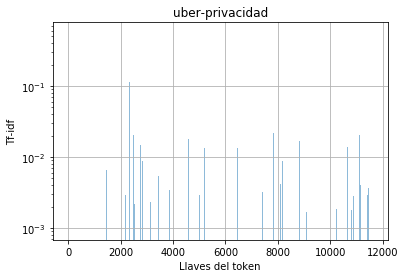

Cantidad de tokens del documento de udemy-condiciones: 7869


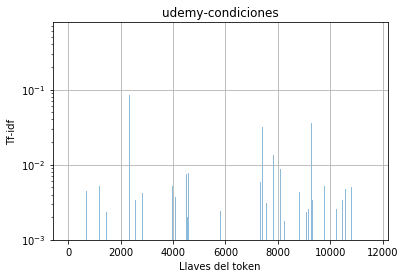

Cantidad de tokens del documento de udemy-privacidad: 7417


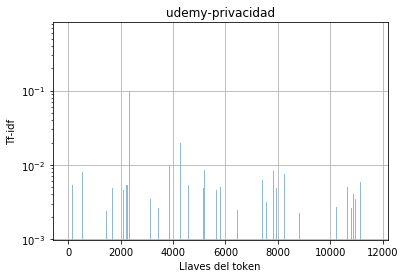

Cantidad de tokens del documento de whatsApp-condiciones: 5015


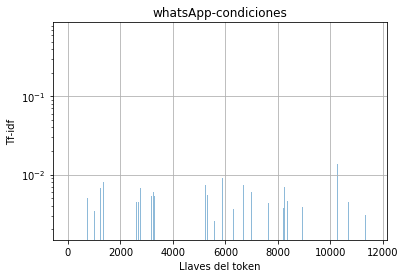

Cantidad de tokens del documento de whatsApp-privacidad: 3798


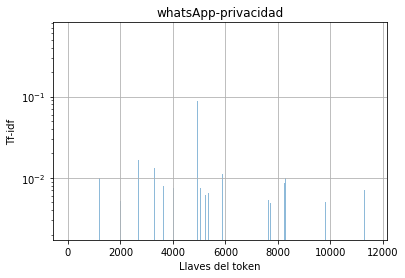

Cantidad de tokens del documento de windows10: 8167


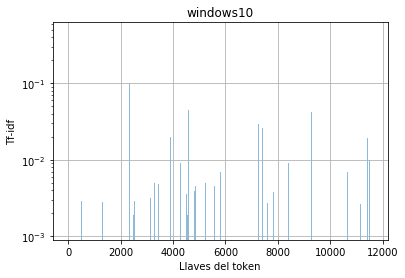

In [28]:
plot_tf_idf(array_tf_idf,ruta,tamaño)

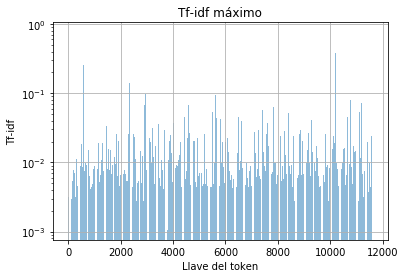

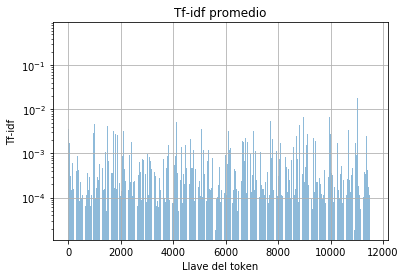

In [29]:
plot_general_tf_idf(array_tf_idf,ruta,result.shape[1])

In [30]:
show_top_tokens(df,ruta,20)

             token    tf_idf  id_documento   nombre_documento
3134            de  0.682033             0  adobe-condiciones
6859           los  0.213524             0  adobe-condiciones
613          adobe  0.213449             0  adobe-condiciones
4059            el  0.200049             0  adobe-condiciones
10222     software  0.192906             0  adobe-condiciones
4201            en  0.165844             0  adobe-condiciones
6605            la  0.158588             0  adobe-condiciones
10346           su  0.153406             0  adobe-condiciones
8926           que  0.148223             0  adobe-condiciones
10060    servicios  0.147637             0  adobe-condiciones
11137        usted  0.146291             0  adobe-condiciones
6626           las  0.134748             0  adobe-condiciones
2016         cloud  0.106634             0  adobe-condiciones
2395   condiciones  0.100606             0  adobe-condiciones
2679     contenido  0.099847             0  adobe-condiciones
2952    

# Plan de procesamiento inicial

- Aplicar stemming (normalizar los tokens).
- Stopwords: eliminación de stopwords generales.
- Eliminar facebook-privacidad (Tiene muchas palabras en inglés con alta frecuencia que sesgan esta técnica).